<h2 align="center"> Univariate Linear Regression </h2>

### Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot') #this is just some themes for the graphs to be displayed
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8) # setting default figure size throughout the notebook

In [3]:
data = pd.read_csv('./data/bike_sharing_data.txt') #putting the data from local file to 'data' variable
data.head() #first 5 of the dataset

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Visualize the Data
---

Most important thing before implementing machine learning models is to visualize your data. This helps in understanding your data as well as to spot any abnormalities in data that would be undetected in numerical analysis. See [Datasaurus Dozen](https://analyticsindiamag.com/what-is-datasaurus-dozen-and-its-relevancy-in-data-science/)

Text(0.5, 1.0, 'Profit in $10000s vs City population in 10000s')

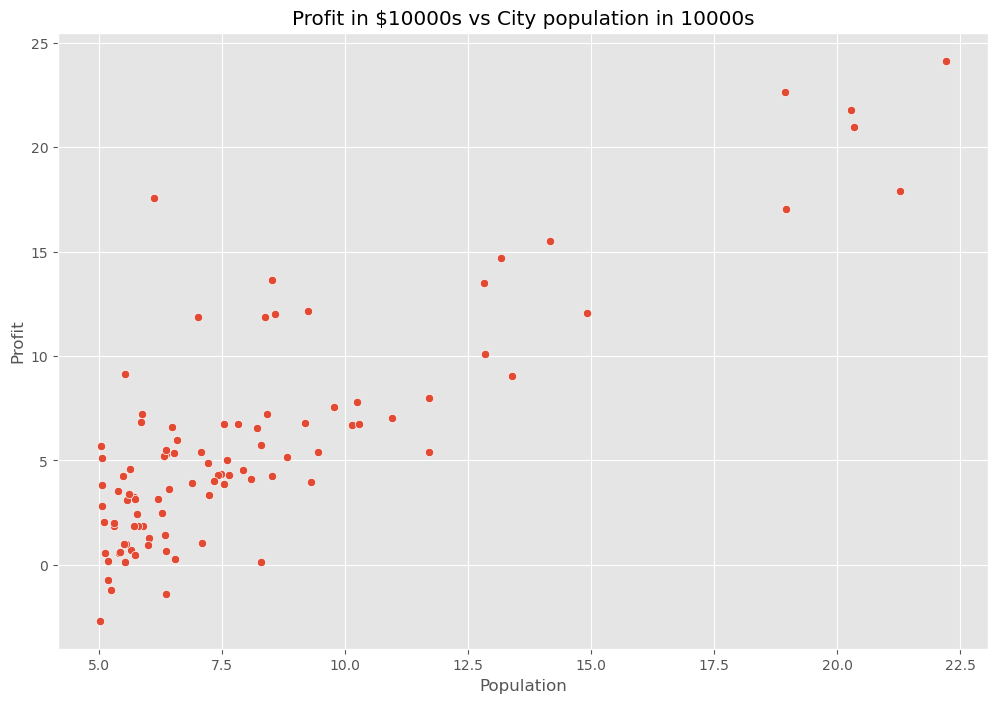

In [5]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profit in $10000s vs City population in 10000s')

As we can see there is clearly some relation(linear relation) between the data, i.e between Population and Profit, what we will now attempt to do is create a best fit line that will approximate the independent variable(Profit) given the dependent variable(Population) with unseen population of the dataset

### Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where _m_ is the length of dataset $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [6]:
#Creating cost function
def cost_function(X, y, theta): #X: independent variable, y: target variable, theta: parameters 
    m = len(y)
    y_pred  = X.dot(theta) 
    error = (y_pred - y) ** 2

    return (1/(2*m)) * np.sum(error)

Lets try out our cost function by setting up X, y, and theta

In [7]:
m = data.Population.values.size
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)
y = data.Profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(X,y,theta)


32.072733877455676

### Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [8]:
#Implementing the gradient descent formula
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(),(y_pred - y))
        theta -= alpha * (1/m) * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [9]:
theta1, costs = gradient_descent(X, y, theta, 0.01, 2000)

In [10]:
#The cost function value
print(costs[-1])

4.4780276098799705


### Visualising the Cost Function $J(\theta)$
---

In [11]:
#Setting up values for the axes
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i,j] = cost_function(X,y,t)
        

/tmp/ipykernel_6158/704310403.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d')


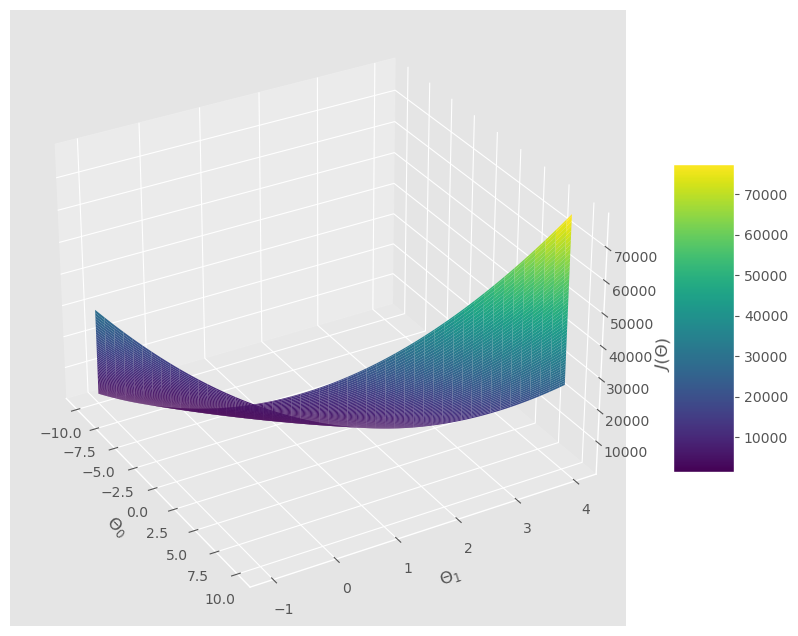

In [12]:
#Plotting the curve
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)

plt.show()

### Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'values of the cost function over iterations of gradient descent')

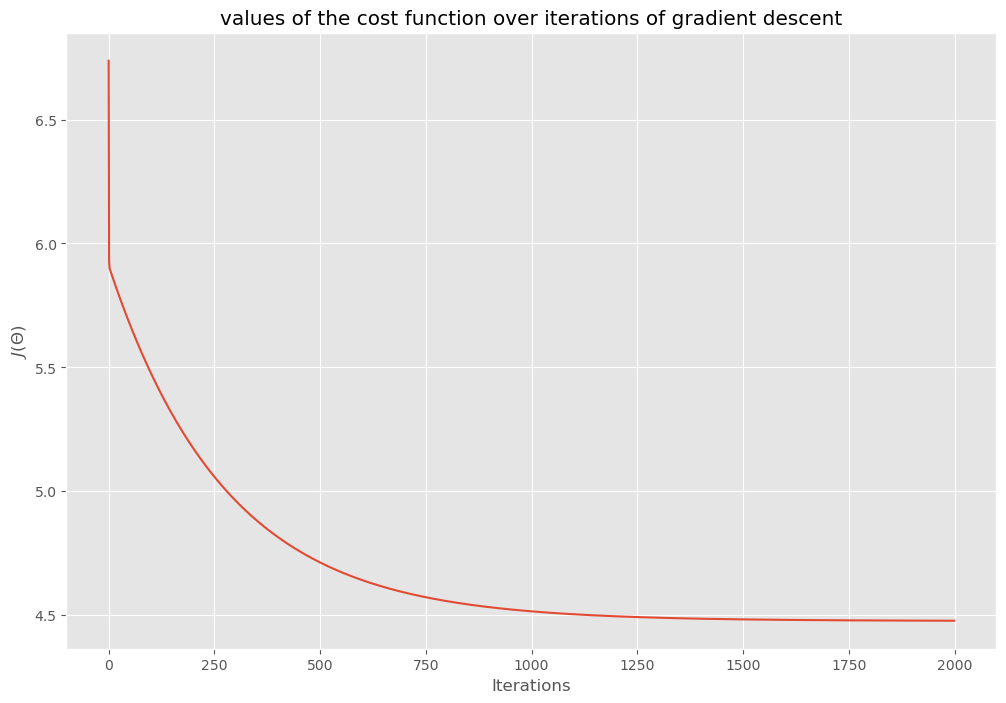

In [13]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("values of the cost function over iterations of gradient descent")

### Visualizing Training Data with Linear Regression Fit
---

In [14]:
#For matrix multiplication we will covert our 2x1 matrix into 1x2
theta = np.squeeze(theta)
print(theta)

[-3.78806857  1.18221277]


/mnt/f6949ea6-23f5-4c75-bca3-14668f4f4d8f/zed/DS/conda/envs/learn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


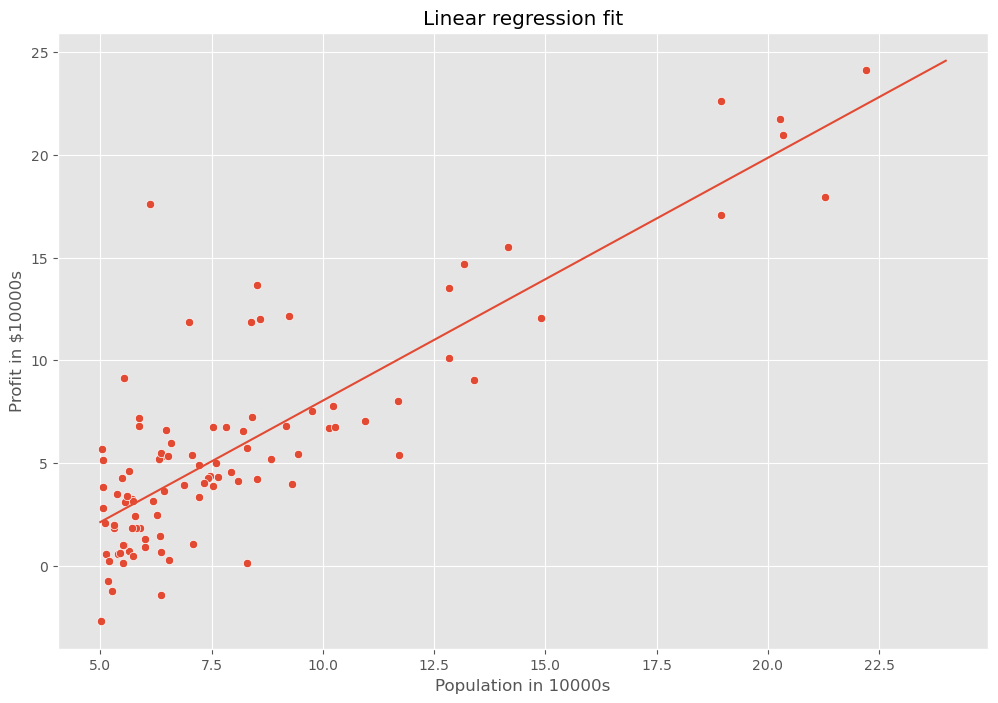

In [15]:
#Plotting Training data
sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5,25)]
y_value = [(x*theta[1] + theta[0]) for x in x_value]

#Plotting best fit line
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear regression fit");

### Inference using the optimized $\theta$ values
---

Lets predict some profit using $h_\theta(x) = \theta^Tx$, for some number of population

In [16]:
#create a function to predict y, given X and theta
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [17]:
#Predicting profit for a population of 40000 people
y_pred1 = predict(np.array([1,4]), theta) *10000
print(f"for a population of 40,000 people, the model predicts a profit of ${round(y_pred1)}")

for a population of 40,000 people, the model predicts a profit of $9408


In [18]:
#Predicting profit for a population of 83000 people
y_pred2 = predict(np.array([1,8.3]), theta) *10000
print(f"for a population of 83,000 people, the model predicts a profit of ${round(y_pred2)}")

for a population of 83,000 people, the model predicts a profit of $60243
